# Neural Networks

## 1. Load the mnist dataset

In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import classification_report, confusion_matrix;
#from sklearn.datasets import
from keras.models import Sequential;
from keras.layers import Dense, Dropout, Flatten, Activation;
import tensorflow as tf;
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv');
df_test = pd.read_csv('test.csv');

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. plot some sample images

In [5]:
df_train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

<Axes: ylabel='count'>

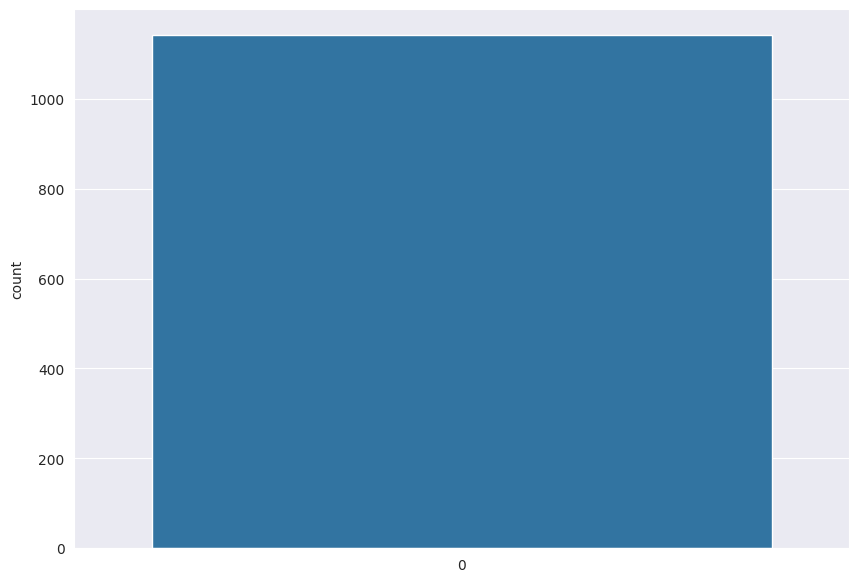

In [6]:
plt.figure(figsize = (10, 7));
sns.set_style('darkgrid')
sns.countplot(df_train['label'])

[28.]


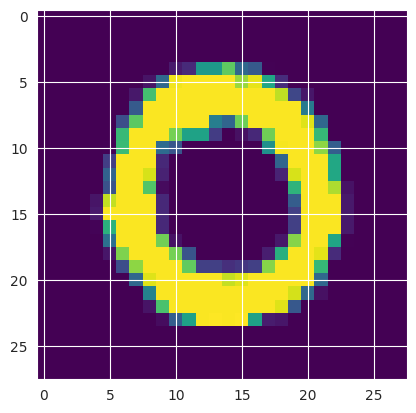

In [7]:
print(np.sqrt(df_train.iloc[1, 1:].shape));
df_train.iloc[1, 1:].values.reshape(28, 28);
plt.imshow(df_train.iloc[1, 1:].values.reshape(28, 28), cmap = "viridis");


[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]


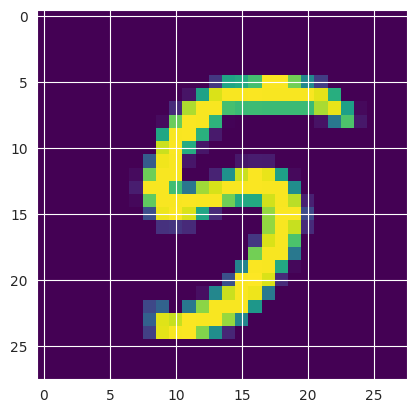

In [8]:
for i in range(1, 9):
    # because iloc[0, 1:] is the label column
    print(np.sqrt(df_train.iloc[1, 1:].shape));
    plt.imshow(df_train.iloc[i, 1:].values.reshape(28, 28), cmap = "viridis")

In [9]:
def plotImages(df, n, cm = 'viridis'):
    #plt.figure(figsize=(10, 7))
    print (np.sqrt(df.iloc[n, 1:].shape));
    plt.imshow(df_train.iloc[n, 1:].values.reshape(28, 28), cmap = cm);

[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]


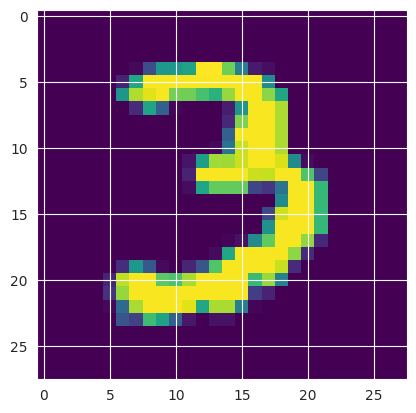

In [10]:
for i in range(1, 10):
    plotImages(df_train, i);

## 3. pre process the target variable to make it binary

#### <strong>NOTE:</strong> This has been done in step 10 using get_dummies()

In [11]:
df_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

In [12]:
import cufflinks as cf;
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot;

In [13]:
init_notebook_mode(connected = True);

In [14]:
import chart_studio.plotly as py;
import plotly.graph_objects as go;

ModuleNotFoundError: ignored

In [15]:
cf.go_offline();

In [16]:
# for gaining a better idea of how the data is plotted/what values vary
go.Figure(data = go.Heatmap(z = df_train.iloc[1, 1:].values.reshape(28, 28)))

NameError: ignored

<Axes: >

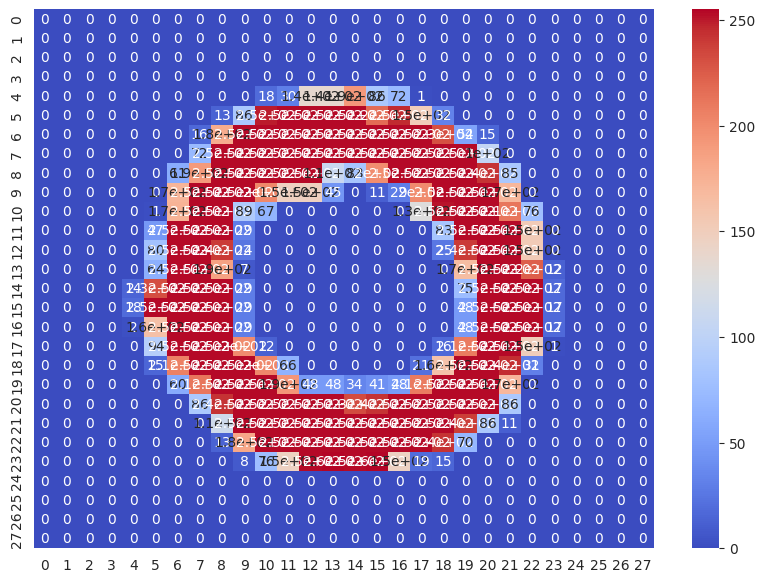

In [17]:
plt.figure(figsize = (10, 7))
sns.heatmap(df_train.iloc[1, 1:].values.reshape(28, 28), annot = True, cmap = 'coolwarm')

<Axes: >

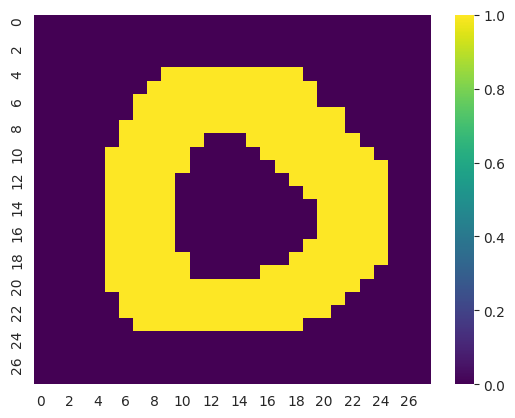

In [18]:
sns.heatmap(df_train.drop(columns='label', axis = 1).apply(lambda x: (x!=0)).iloc[4].values.reshape(28, 28), cmap = 'viridis')

In [19]:
#df_train_bin = df_train.drop(columns='label', axis = 1).apply(lambda x: (x!=0))
#df_train_bin = df_train.apply(lambda x: (x!=0));
def preprocess (df):
    for i in df.columns:
        df[i] = df[i].replace(0, np.nan);
        df[i] = df[i].fillna(df[i].mean());
    scaler = StandardScaler();
    scaler.fit(df);
    ans = scaler.transform(df);
    return df


In [20]:
#df_train_bin['label'] = df_train['label'];
df_train_bin = preprocess(df_train.drop(columns = 'label', axis = 1));
df_test_bin = preprocess(df_test);
df_train_bin['label'] = df_train['label'];

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning:

invalid value encountered in divide



In [ ]:
#df_test_bin = df_test.apply(lambda x: (x!=0));

## 4. construct a neural network

In [21]:
X = df_train.drop(columns = 'label', axis = 1);
y = df_train['label'];
# NOTE: TARGET DATA HAS BEEN MADE BINARY HERE VVVV!!!!
y = pd.get_dummies(y);
X = X.replace(False, 0);
X = X.replace(True, 1);
#y = y.replace(False, 0);
#y = y.replace(True, 1);

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101);
X_train.reset_index();
X_test.reset_index();
y_test.reset_index();
y_train.reset_index();

X_train = np.reshape(X_train, [-1, 784]);
X_train = X_train.astype('float32') / 255;
X_test = np.reshape(X_test, [-1, 784]);
X_test = X_test.astype('float32') / 255;


In [23]:
y_train.value_counts()

0  1  2  3  4  5  6  7  8  9
0  0  1  0  0  0  0  0  0  0    97
      0  0  1  0  0  0  0  0    94
1  0  0  0  0  0  0  0  0  0    89
0  0  0  0  0  0  0  1  0  0    80
                     0  1  0    77
                        0  1    76
               1  0  0  0  0    76
               0  1  0  0  0    75
         1  0  0  0  0  0  0    70
   1  0  0  0  0  0  0  0  0    65
dtype: int64

In [24]:
model = Sequential();
#model.add (Flatten(input_shape = (28, 28)));
#model.add(Dense(8, activation = 'relu', input_dim = 784));
model.add(Dense(256, input_dim = 784));
model.add(Activation('relu'));
model.add(Dropout(0.125));
model.add(Dense(256));
model.add(Activation('relu'));
model.add(Dropout(0.125));
model.add(Dense(10));
#model.add(Dense(1, activation = 'sigmoid'));
model.add(Dense(10, activation = 'softmax'));
#model.add(Dense(1, activation = 'softmax'));

In [25]:
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy']);
NN_Train = model.fit(X_train, y_train, epochs = 50, batch_size= 128, validation_data= (X_test, y_test));

Epoch 1/50
7/7 [==============================] - 5s 156ms/step - loss: nan - accuracy: 0.2140 - val_loss: nan - val_accuracy: 0.0787
Epoch 2/50
7/7 [==============================] - 0s 38ms/step - loss: nan - accuracy: 0.1114 - val_loss: nan - val_accuracy: 0.0787
Epoch 3/50
7/7 [==============================] - 0s 43ms/step - loss: nan - accuracy: 0.1114 - val_loss: nan - val_accuracy: 0.0787
Epoch 4/50
7/7 [==============================] - 0s 52ms/step - loss: nan - accuracy: 0.1114 - val_loss: nan - val_accuracy: 0.0787
Epoch 5/50
7/7 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.1114 - val_loss: nan - val_accuracy: 0.0787
Epoch 6/50
7/7 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.1114 - val_loss: nan - val_accuracy: 0.0787
Epoch 7/50
7/7 [==============================] - 0s 31ms/step - loss: nan - accuracy: 0.1114 - val_loss: nan - val_accuracy: 0.0787
Epoch 8/50
7/7 [==============================] - 0s 31ms/step - los

In [26]:
y_train_pred = model.predict(X_train);
y_test_pred = model.predict(X_test);
y_train_pred = np.argmax(y_train_pred, axis = 1);
y_test_pred = np.argmax(y_test_pred, axis = 1);
y_test_test_pred = np.argmax(model.predict(df_test), axis = 1);
#y_train_pred.argmin()

36/36 [==============================] - 0s 5ms/step


In [27]:
model.summary()

#print (confusion_matrix(y_train_pred, y_train));
#print (classification_report(y_train_pred, y_train));

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [28]:

lossVal, accVal = model.evaluate(X_test, y_test, batch_size=128);

3/3 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.0787


### Alt. approach [IGNORE: JUST ROUGH WORK HERE]

In [ ]:
def altProcess(img):
    return tf.cast(img, tf.float32) / 255.;

In [ ]:
#X_train_alt = X_train.map(altProcess);
#X_test_alt = X_test.map(altProcess);


In [ ]:
#model = Sequential();
#model.add(Flatten(input_shape = (28, 28)));
#model.add (Dense (128, activation = 'relu'));
#model.add (Dense(10));
#model.add(Dense(1, activation = 'sigmoid'));
#model.add(Dense(1, activation = 'softmax'));

In [ ]:
#model.compile(optimizer = 'adam', loss= 'SparseCategoricalCrossentropy', metrics = ['accuracy', 'SparseCategoricalAccuracy']);
#NN_train = model.fit(X_train, y_train, epochs = 50);

## 5. plot the network (visualise/summarise)

In [29]:
# I tried figuring out the visualization of this but there is no real reference for any of this so I just resorted to this.
# I hope this is what was implied by 'summarise' and not like, an entire text bloc with elaborations :/

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [30]:
# NOTE: I don't think I'd have been able to figure this out without a reference!!!
# SRC: https://exerror.com/solved-runtimeerror-failed-to-execute-dot-tpdf-o-test-make-sure-the-graphviz-executables-are-on-your-systems-path/

# Nevermind. I cannot figure out how to do this!!

from ann_visualizer.visualize import ann_viz;
import os;
#os.environ["PATH"] += os.pathsep + 'C:\\Users\\Shahbaz\\anaconda3\\Lib\\site-packages\\graphviz';


#ann_viz(model, title = "MNIST Serialized Neural Net", view = True, filename = 'savedNN.gv')
#train_history = model.history
#from keras.utils.vis_utils import plot_model;

#plot_model(model, show_shapes = True, show_layer_names= True)

ModuleNotFoundError: ignored

## 6. train the network

Done in section 10

## 7. plot epoch vs accuracy curve

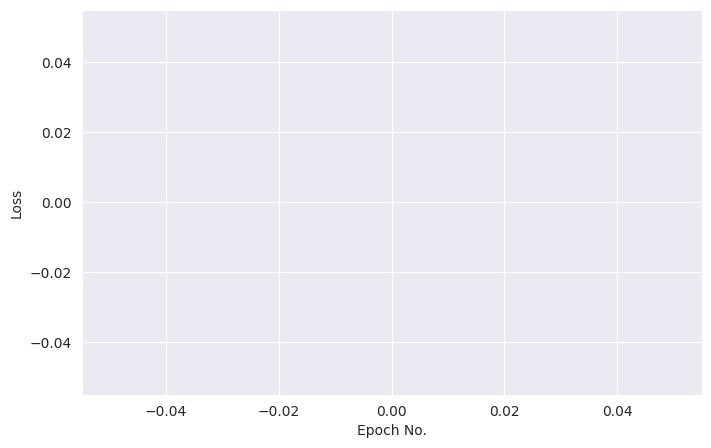

In [31]:
sns.set_style("darkgrid");
plt.figure(figsize = (8, 5))
plt.plot(range(0, 50), NN_Train.history['loss'], color = 'b');
plt.plot(range(0, 50), NN_Train.history['val_loss'], color = 'r', ls = '--');
plt.xlabel('Epoch No.');
plt.ylabel('Loss');

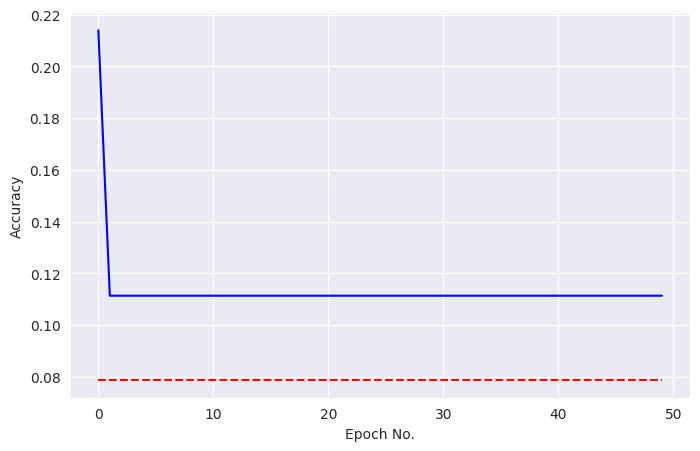

In [32]:
sns.set_style("darkgrid");
plt.figure(figsize = (8, 5))
plt.plot(range(0, 50), NN_Train.history['accuracy'], color = 'b');
plt.plot(range(0, 50), NN_Train.history['val_accuracy'], color = 'r', ls = '--');
plt.xlabel('Epoch No.');
plt.ylabel('Accuracy');

## 8. print the results

In [33]:
lossVal, accVal = model.evaluate(X_test, y_test, batch_size=128);


3/3 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.0787


In [34]:
print ('Loss Value: ', lossVal);
print ('Accuracy Value: ', accVal);

Loss Value:  nan
Accuracy Value:  0.0787172019481659
